
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook is an instance of the Selecti

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](http://syzygy.ca) and for help with this notebook. -- I. Heisz

In [2]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [31]:
## Define some methods
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def nsercPlot (data):
    fig, axes = plt.subplots()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    y = data.groupby(xAxis).sum()[yAxis]
    x = y.index
    
    plt.xlabel(xAxis, fontsize=14)
    plt.ylabel(yAxis, fontsize=14)
    plt.title(title)
      
    plt.plot(x,y)
    
    init_notebook_mode(connected=True)
    
    axes.scatter(x,y,s=plotPointSizes,alpha=opacity)
    canvas = FigureCanvas(fig)
    plotly_fig = tls.mpl_to_plotly(fig)
    py.iplot(plotly_fig)
    
    return;

def viewAvailableSearch(column, searchString):
    available = df.drop_duplicates(subset = column)
    available = available[available[column].str.contains(searchString, na=False)]
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

def overview(column, data):
    mean = data[columnYouWantInformationOn].mean()
    print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

    median = data[columnYouWantInformationOn].median()
    print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

    standardDeviation = data[columnYouWantInformationOn].std()
    print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

    awardCount = data.AwardAmount.count()
    print('The total number of awards for your selection is ' + str(awardCount))
    return;

In [12]:
df

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,18,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,16,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,147,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,146,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,146,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,146,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,24,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,6,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,8,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,7,Software and development


## Analyze Discovery Programs over Time

In [14]:
## Localize Data to Discovery Programs
DiscoveryPrograms = df

DiscoveryPrograms = DiscoveryPrograms.loc[(DiscoveryPrograms['ProgramNameEN'].str.contains("iscovery"))]


In [6]:
DiscoveryPrograms.sort_values(by='AwardAmount', ascending=False)

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
21653,"Vincent, Warwick",Biologie,51,Université Laval,Québec,CANADA,2012,1140000,RGPDF,Discovery Frontiers - Northern Earth System Re...,1573,Earth-systems science
10271,"Vincent, Warwick",Biologie,51,Université Laval,Québec,CANADA,2013,1070000,RGPDF,Discovery Frontiers - Northern Earth System Re...,1573,Earth-systems science
22287,"Vincent, Warwick",Biologie,51,Université Laval,Québec,CANADA,2014,1070000,RGPDF,Discovery Frontiers - Northern Earth System Re...,1573,Earth-systems science
5946,"Ekeland, Ivar",Pacific Institute for the Mathematical Sciences,2,University of British Columbia,British Columbia,CANADA,2007,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
11686,"Lalonde, François",Mathématiques et de statistique,63,Université de Montréal,Québec,CANADA,2007,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
10463,"Lalonde, François",Mathématiques et de statistique,63,Université de Montréal,Québec,CANADA,2004,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
4298,"Davidson, Kenneth",Fields Institute for Research in Mathematical ...,31,University of Toronto,Ontario,CANADA,2003,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
5681,"Ekeland, Ivar",Pacific Institute for the Mathematical Sciences,2,University of British Columbia,British Columbia,CANADA,2005,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
11023,"Lalonde, François",Mathématiques et de statistique,63,Université de Montréal,Québec,CANADA,2005,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics
5416,"Ekeland, Ivar",Pacific Institute for the Mathematical Sciences,2,University of British Columbia,British Columbia,CANADA,2004,1023100,RGPIT,Discovery Grants Program - Institutes and Init...,337,Pure mathematics


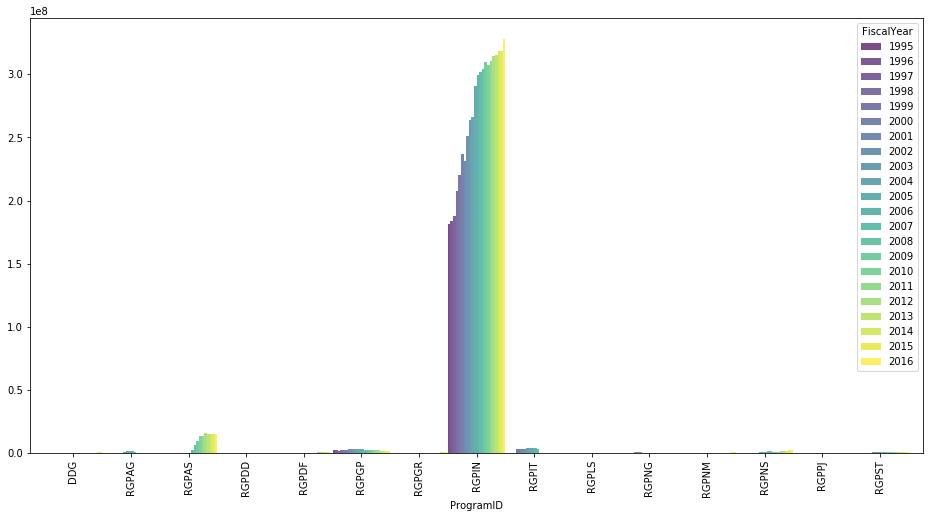

In [15]:
(DiscoveryPrograms.groupby(['ProgramID','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

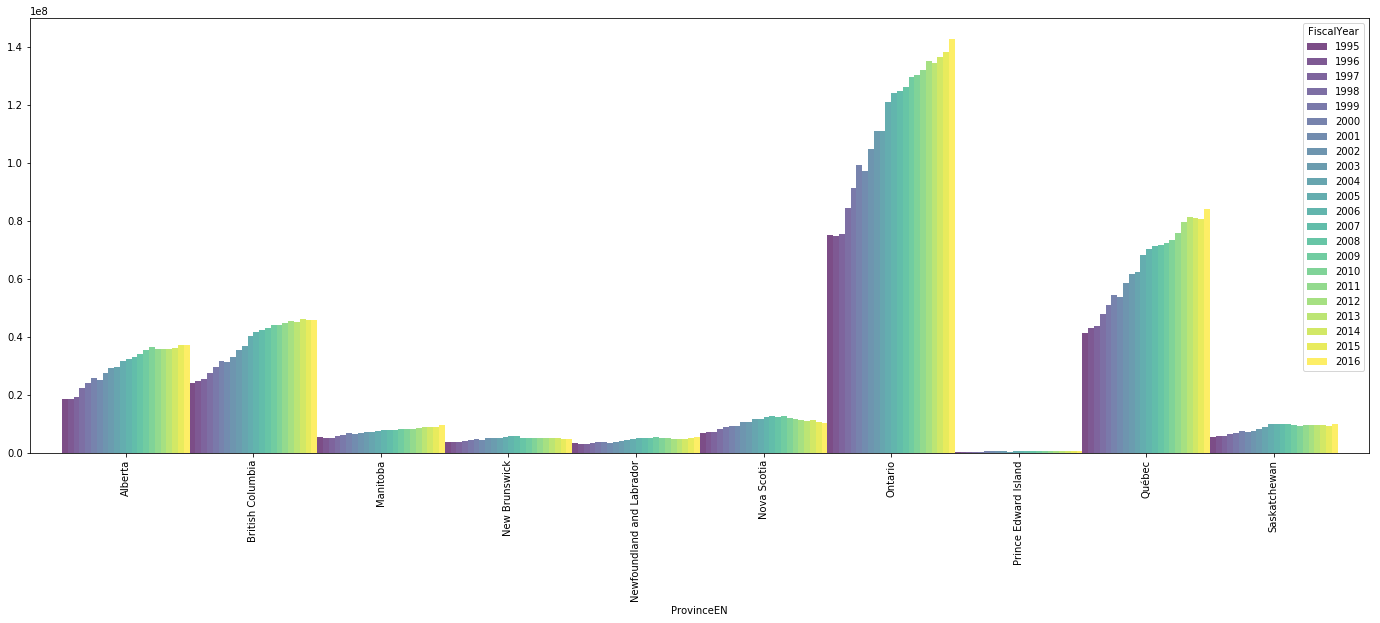

In [19]:
(DiscoveryPrograms.groupby(['ProvinceEN','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1)

In [5]:
## Programs Outside Discovery

NotDiscoveryPrograms = df

NotDiscoveryPrograms = NotDiscoveryPrograms.loc[(~NotDiscoveryPrograms['ProgramNameEN'].str.contains("iscovery"))]

In [19]:
NotDiscoveryPrograms.sort_values(by='AwardAmount', ascending=False)

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
10167,"Hormes, Josef",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2008,15600000,MFAIF,Major Facilities Access Grants,99,Biological and Medical Physics
20920,"Thomlinson, William",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2007,14600000,MFAIF,Major Facilities Access Grants,99,Biological and Medical Physics
9371,"Hormes, Josef",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2011,12000000,MRSIF,Major Resources Support Program - Infrastructure,1051,Other studies in natural sciences and engineering
9579,"Hormes, Josef",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2010,12000000,MRSIF,Major Resources Support Program - Infrastructure,1051,Other studies in natural sciences and engineering
9090,"Hewson, William",Head Office,27728,Bioindustrial Innovation Centre,Ontario,CANADA,2007,11985000,CECGP,Centres of Excellence for Commercialization an...,341,Not available
20155,"Thomlinson, William",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2006,11600000,MFAIF,Major Facilities Access Grants,99,Biological and Medical Physics
9487,"Hormes, Josef",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2012,11000000,MRSIF,Major Resources Support Program - Infrastructure,1051,Other studies in natural sciences and engineering
9840,"Hormes, Josef",Physics and Engineering Physics,16,University of Saskatchewan,Saskatchewan,CANADA,2009,10600000,MRSIF,Major Resources Support Program - Infrastructure,1051,Other studies in natural sciences and engineering
7236,"Gardner, Philip",Head Office,27708,"Advanced Applied Physics Solutions, Inc.",British Columbia,CANADA,2007,10500000,CECGP,Centres of Excellence for Commercialization an...,341,Not available
10861,"Killeen, Ron",Head Office,22989,OCE Inc.,Ontario,CANADA,2007,10500000,CECGP,Centres of Excellence for Commercialization an...,341,Not available


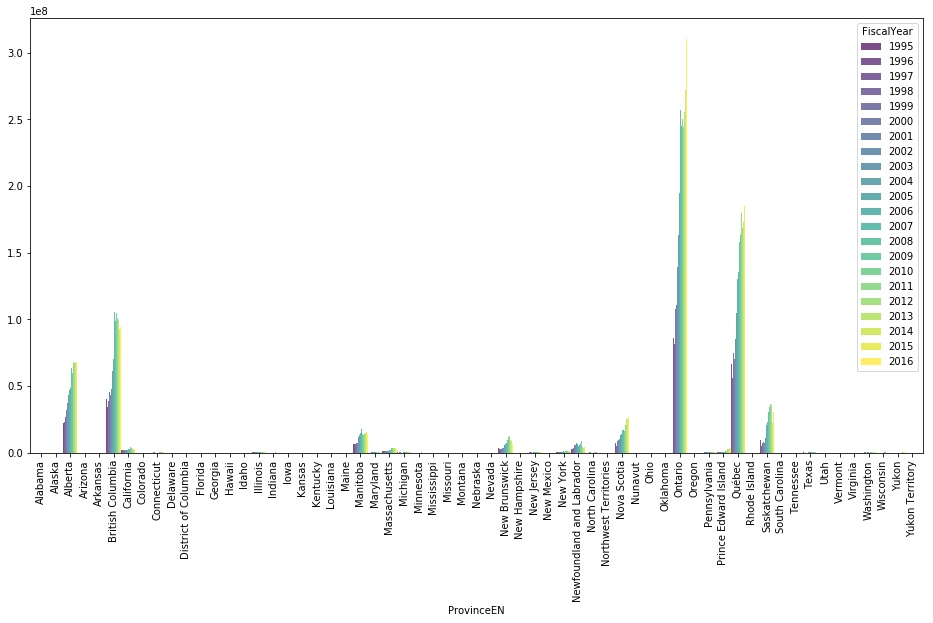

In [8]:
(NotDiscoveryPrograms.groupby(['ProvinceEN','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

## Big Winners

In [29]:
## Historical PI recipents of most NSERC funds: 1995 -- 2016
df.groupby(['Name']).sum()['AwardAmount'].sort_values(ascending=False).head(n=50)


Name
Hormes, Josef           99836800
Gupta, Arvind           97587570
McWalter, Ian           75503588
Fortier, Louis          72542772
Frise, Peter            63874923
Barge, Brian            50400000
Thomlinson, William     46610800
Fedosejevs, Robert      40720798
McDonald, Arthur        36781300
Orr, Robert             32043881
Smith, Donald           31227906
Mufti, Aftab            28761712
Wallace, Douglas        28433833
Servos, Mark            28130452
Rogers, Harry           27590000
Salama, Andre           26296562
Burton, Howard          25000000
Yada, Rickey            24982617
Clowes, Ronald          24072844
Pelton, Robert          23985763
Svensson, Carl          22782441
Lamb, Robert            21349800
Chrisman, Nicholas      21286250
Larter, Stephen         20024564
Bourbonnais, Normand    17753965
Eyton, Anthony          17575000
Booth, Kellogg          16879011
McPherson, Robert       16858697
Plant, David            16346618
Emadi, Ali              16107231
Withe

In [37]:
section1508 = df.loc[(df['Committee'] == 1508)]

In [36]:
title = '1508 vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(section1508)

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

In [38]:
EvaluationGroups = df.loc[(df['Committee']==1501) 
                                   | (df['Committee']==1502)
                                   | (df['Committee']==1503)
                                   | (df['Committee']==1504) 
                                   | (df['Committee']==1505)
                                   | (df['Committee']==1506)
                                   | (df['Committee']==1507)
                                   | (df['Committee']==1508)
                                   | (df['Committee']==1509)
                                   | (df['Committee']==1510)
                                   | (df['Committee']==1511)
                                   | (df['Committee']==1512)]

In [107]:
## 2009 is an outlier so drop it.
EG = EvaluationGroups.loc[~(EvaluationGroups['FiscalYear']==2009)]

In [106]:
EG['FiscalYear'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

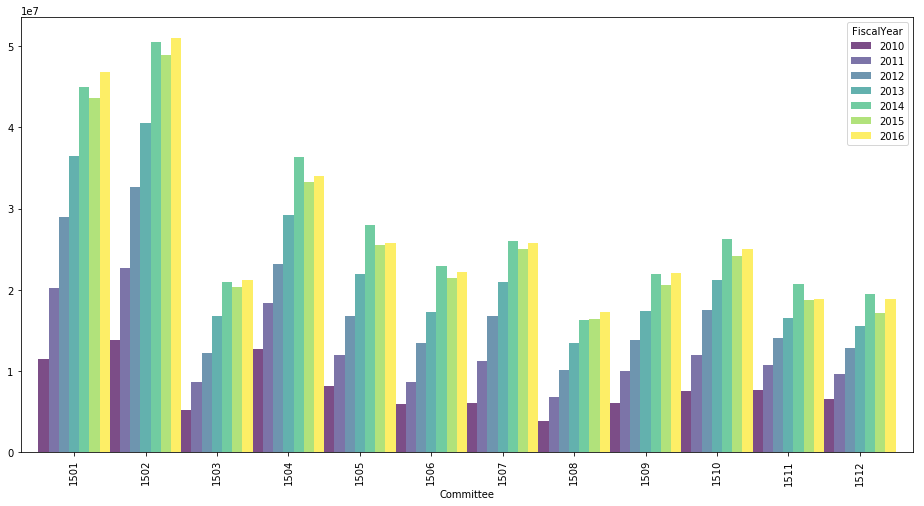

In [111]:
## Total investment dollars vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

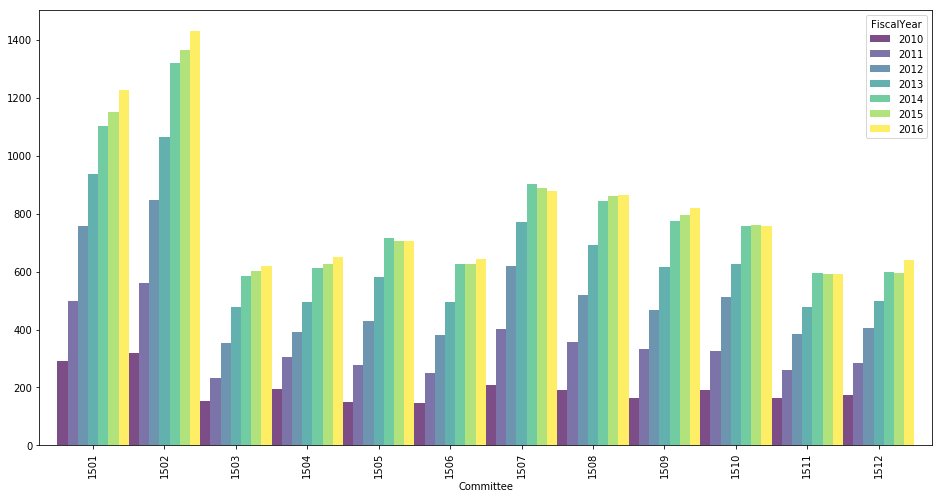

In [112]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

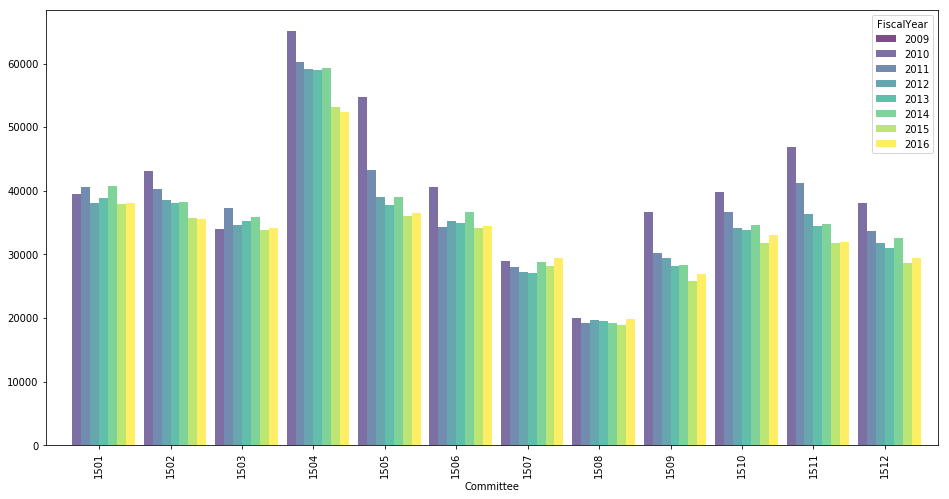

In [113]:
## Total Dollars invested divided by number of awards vs. Fiscal Year separated by Evaluation Group Committee
((EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'])/(EvaluationGroups.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'])).unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

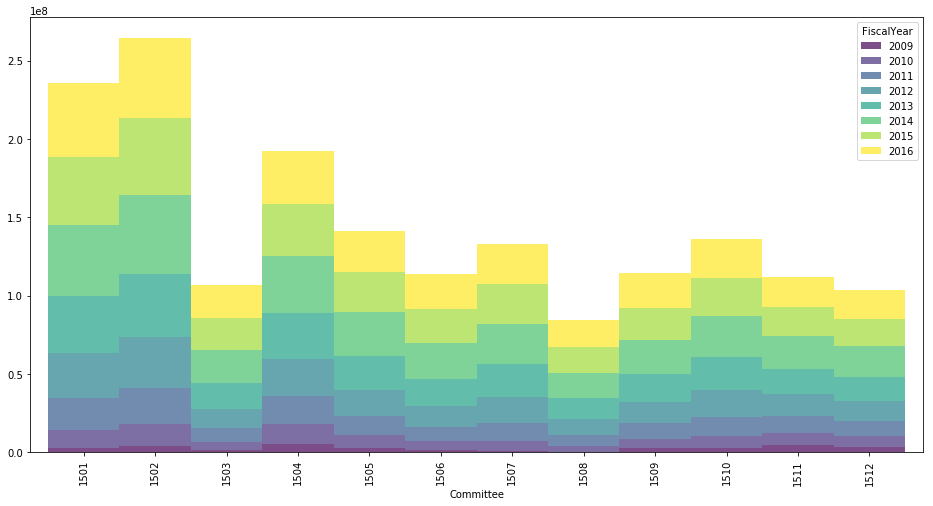

In [40]:
(EvaluationGroups.groupby(['Committee','FiscalYear']).sum()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

In [53]:
EvaluationGroups['ProgramID'].unique()

array(['EQPEQ', 'RGPIN', 'RGPGP', 'MISPJ', 'DDG'], dtype=object)

## Math Stats

In [84]:
# mathstats = df.loc[(df['Committee'] == 1508) | (df['Committee']==1579)]
mathstats = df.loc[(df['Committee'] == 1508)] 

In [85]:
mathstats

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1753,"Bergeron, François",Mathématiques,57,Université du Québec à Montréal,Québec,CANADA,2009,34728,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
3805,"Chen, Gemai",Mathematics and Statistics,11,University of Calgary,Alberta,CANADA,2009,46190,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Mathematical modelling
5722,"Doebeli, Michael",Zoology,2,University of British Columbia,British Columbia,CANADA,2009,48530,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
5780,"Doran, Charles",Mathematical and Statistical Sciences,9,University of Alberta,Alberta,CANADA,2009,23630,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
18980,"Russell, Peter",Mathematics and Statistics,63,Université de Montréal,Québec,CANADA,2009,38941,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
24129,"Yu, Hao",Statistical and Actuarial Sciences,36,University of Western Ontario,Ontario,CANADA,2009,25341,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Statistical theory
112,"Adamic, Peter",Mathematics and Computer Science,26,Laurentian University of Sudbury,Ontario,CANADA,2010,12000,RGPIN,Discovery Grants Program - Individual,1508,Statistics and probability
140,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
320,"Alexakis, Spyridon",Mathematics,31,University of Toronto,Ontario,CANADA,2010,30000,RGPIN,Discovery Grants Program - Individual,1508,Differential geometry
569,"Angel, Omer",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Probability theory


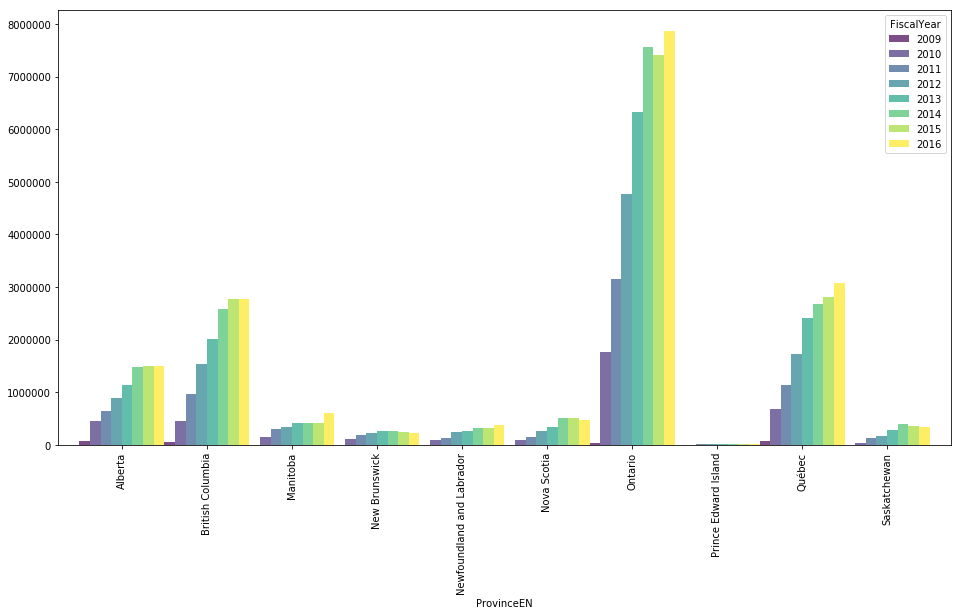

In [86]:
(mathstats.groupby(['ProvinceEN','FiscalYear']).sum()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

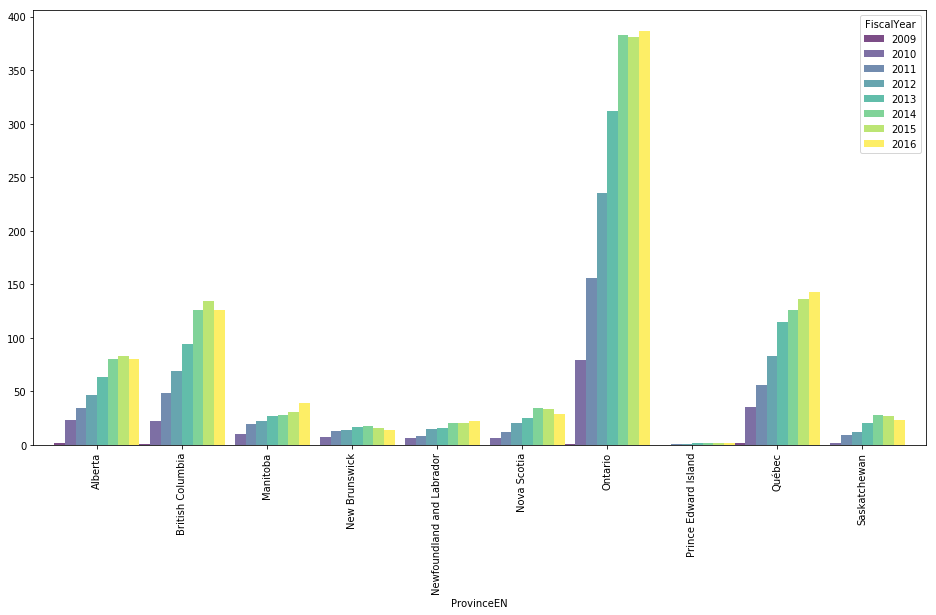

In [87]:
(mathstats.groupby(['ProvinceEN','FiscalYear']).count()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

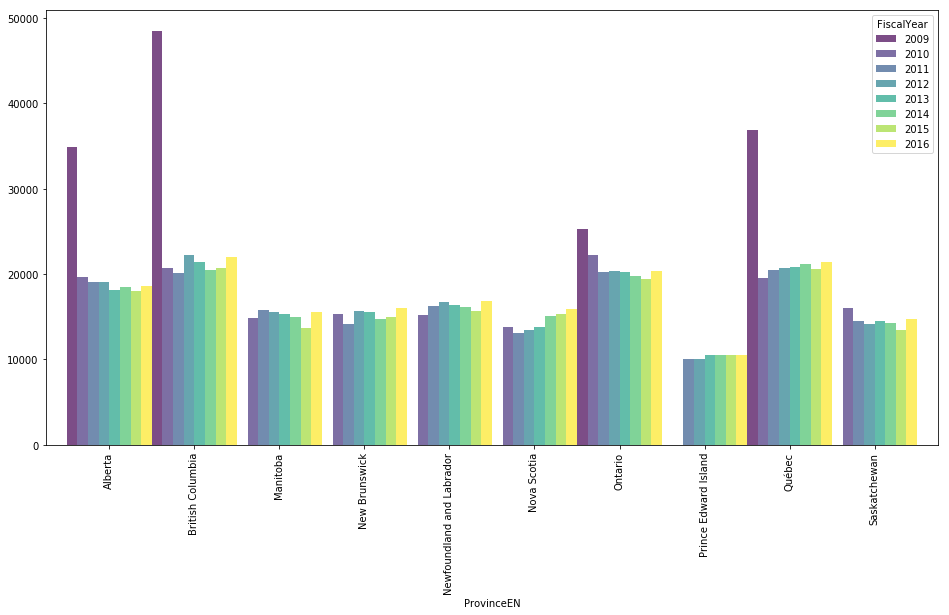

In [88]:
## Average Award Amount over time by province
((mathstats.groupby(['ProvinceEN','FiscalYear']).sum()['AwardAmount'])/
 (mathstats.groupby(['ProvinceEN','FiscalYear']).count()['AwardAmount'])).unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

In [91]:
## What's going on with 2009? 
## Oh. This is an edge case. There are only 6 awards in 1508 during 2009...
mathstats.loc[mathstats['FiscalYear']==2009]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1753,"Bergeron, François",Mathématiques,57,Université du Québec à Montréal,Québec,CANADA,2009,34728,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
3805,"Chen, Gemai",Mathematics and Statistics,11,University of Calgary,Alberta,CANADA,2009,46190,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Mathematical modelling
5722,"Doebeli, Michael",Zoology,2,University of British Columbia,British Columbia,CANADA,2009,48530,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
5780,"Doran, Charles",Mathematical and Statistical Sciences,9,University of Alberta,Alberta,CANADA,2009,23630,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
18980,"Russell, Peter",Mathematics and Statistics,63,Université de Montréal,Québec,CANADA,2009,38941,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
24129,"Yu, Hao",Statistical and Actuarial Sciences,36,University of Western Ontario,Ontario,CANADA,2009,25341,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Statistical theory


In [29]:
mathstats.sort_values(by="AwardAmount", ascending=False)

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
8975,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2016,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
8823,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2015,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
23081,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4455,"Colliander, James",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22533,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
1234,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4585,"Craig, Walter",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2014,910500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
1201,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2014,885500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22299,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2014,860500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
7908,"Ghoussoub, Nassif",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,681000,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics


In [57]:
## 2014 did not include BIRS in the CTRMS envelope
mathstats14 = mathstats.loc[mathstats['FiscalYear'] == 2014]

In [58]:
mathstats15 = mathstats.loc[mathstats['FiscalYear'] == 2015]

In [59]:
mathstats16 = mathstats.loc[mathstats['FiscalYear'] == 2016]

In [67]:
## 2014 did not include BIRS in the CTRMS envelope
mathstats14.loc[mathstats14['ProgramID']=='CTRMS']['AwardAmount'].sum()/mathstats14['AwardAmount'].sum()

0.1406142564276833

In [64]:
## 2015 did not include BIRS in the CTRMS envelope
mathstats15.loc[mathstats15['ProgramID']=='CTRMS']['AwardAmount'].sum()/mathstats15['AwardAmount'].sum()

0.17758590778003785

In [68]:
## BIRS was included in the 2016 CTRMS envelope
mathstats16.loc[mathstats16['ProgramID']=='CTRMS']['AwardAmount'].sum()/mathstats16['AwardAmount'].sum()

0.19643852409173354

In [70]:
mathstats15['AwardAmount'].sum()

19886150

## CITA

In [49]:
viewAvailableSearch('Name', 'Murray, Norman')

Name
Murray, Norman


In [50]:
df.loc[df['Department']=='Cdn Inst. for Theoretical Astrophys']

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
10225,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
9199,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1996,25000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
8923,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1997,25000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
9429,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1998,45100,RGPIN,Discovery Grants Program - Individual,17,Planetary and solar system
10794,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1999,47355,RGPIN,Discovery Grants Program - Individual,17,Planetary and solar system
11221,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2000,47355,RGPIN,Discovery Grants Program - Individual,17,Planetary and solar system
11222,"Murray, Norman","CITA, SGS/Astronomy, Faculty of Arts & S",31,University of Toronto,Ontario,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Astronomy and astrophysics
10963,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2001,55000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
10964,"Murray, Norman","CITA, SGS/Astronomy, Faculty of Arts & S",31,University of Toronto,Ontario,CANADA,2001,200000,CRC,Canada Research Chairs,9998,Astronomy and astrophysics
11733,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2002,55000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics


In [52]:
cita = df.loc[(df['Department']=='Cdn Inst. for Theoretical Astrophys') 
        |(df['Department'] == 'CITA, SGS/Astronomy, Faculty of Arts & S')
        |(df['Department']=='Canadian Inst. Theoretical Astrophysics')
        |(df['Department']=='CITA')]

In [53]:
cita

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1427,"Bond, JRichard",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,585000,CSPPR,Collaborative Special Project Grants,127,Astronomy and astrophysics
1428,"Bond, JRichard",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,80000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
2318,"Chaboyer, Brian",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9704,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
6887,"Johnstone, Douglas",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,11107,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
7012,"Kaiser, Nicholas",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,80000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
9215,"Martin, Peter",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,45000,RGPIN,Discovery Grants Program - Individual,17,Galactic
10197,"Murakami, Izumi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9093,CIF,Canada International Fellowships (H),148,Astronomy and astrophysics
10225,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
11892,"Richardson, Derek",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9704,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
11893,"Richardson, Derek",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,19296,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics


In [54]:
title = 'CITA vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(cita)

/home/jcollian/.local/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



In [56]:
cita.sort_values(by='AwardAmount')

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
9675,"Helfield, Brandon",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2008,84,URU,University Undergraduate Student Research Awards,996,Astronomy and astrophysics
544,"Armitage, Charmaine",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2003,501,URU,University Undergraduate Student Research Awards,997,Astronomy and astrophysics
11765,"Kim, Daekwan",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2008,511,URU,University Undergraduate Student Research Awards,996,Astronomy and astrophysics
7183,"Fitzgerald, Joseph",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2008,649,URU,University Undergraduate Student Research Awards,996,Astronomy and astrophysics
11448,"Parikh, Anuj",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1999,4000,URU,University Undergraduate Student Research Awards,166,Astronomy and astrophysics
415,"Armitage, Charmaine",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2001,4000,URU,University Undergraduate Student Research Awards,997,Astronomy and astrophysics
8907,"Lee, Brian",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2000,4000,URU,University Undergraduate Student Research Awards,166,Astronomy and astrophysics
9003,"Leung, LouisShunHim",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2001,4000,URU,University Undergraduate Student Research Awards,997,Astronomy and astrophysics
14154,"Spekkens, Kristine",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1999,4000,URU,University Undergraduate Student Research Awards,166,Astronomy and astrophysics
14261,"Sigurdson, Kris",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2000,4000,URU,University Undergraduate Student Research Awards,166,Astronomy and astrophysics


In [64]:
df.loc[df['Name'] == 'Pen, UeLi']

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
11652,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1999,31500,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
12144,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2000,31500,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
11848,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2001,31500,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
12680,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2002,31500,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
14656,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2003,36000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
14765,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2004,36000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
15564,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2005,36000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
15931,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2006,72500,SROPJ,Special Research Opportunity Program - Project,1024,Extra galactic and cosmology
15932,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2006,36000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
16538,"Pen, UeLi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,2007,21000,EQPEQ,Research Tools and Instruments - Category 1 (<...,17,Extra galactic and cosmology


In [63]:
df.loc[df['Department'] == 'Cdn Inst. for Theoretical Astrophys']

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1427,"Bond, JRichard",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,585000,CSPPR,Collaborative Special Project Grants,127,Astronomy and astrophysics
1428,"Bond, JRichard",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,80000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
2318,"Chaboyer, Brian",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9704,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
6887,"Johnstone, Douglas",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,11107,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
7012,"Kaiser, Nicholas",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,80000,RGPIN,Discovery Grants Program - Individual,17,Extra galactic and cosmology
9215,"Martin, Peter",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,45000,RGPIN,Discovery Grants Program - Individual,17,Galactic
10197,"Murakami, Izumi",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9093,CIF,Canada International Fellowships (H),148,Astronomy and astrophysics
10225,"Murray, Norman",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,17,Astronomy and astrophysics
11892,"Richardson, Derek",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,9704,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics
11893,"Richardson, Derek",Cdn Inst. for Theoretical Astrophys,31,University of Toronto,Ontario,CANADA,1995,19296,PDF,Postdoctoral Fellowships,148,Astronomy and astrophysics


In [67]:
df.loc[df['ProgramID']=='CITA']['ProgramNameEN']

16116    Canadian Institute for Theoretical Astrophysic...
Name: ProgramNameEN, dtype: object

In [70]:
df.loc[df['ProgramNameEN']=='Canadian Institute for Theoretical Astrophysics']

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
